In [1]:
import numpy as np
import pandas as pd
import redis

In [2]:
# # Connect to Redis Client
# hostname = 'redis-10979.c325.us-east-1-4.ec2.cloud.redislabs.com'
# portnumber = 10979
# password = 'GWVgMSfgj1LpLCevrcAXKaZiYiFwNsls'

# r = redis.StrictRedis(host=hostname,
#                       port=portnumber,
#                       password=password)

r=redis.StrictRedis(host='redis-17717.c264.ap-south-1-1.ec2.redns.redis-cloud.com',
                    port=17717,
                    password='aVM34EdTiZHjNCqsGlQrtj0wDI0ea7ll')

In [3]:
r.ping()

True

In [4]:
name = 'attendance:logs'


logs = r.lrange(name, start=0, end=-1)


In [5]:
df = pd.DataFrame(list(map(lambda x:x.decode('utf-8').split('@'),logs)),
                  columns=['Name','Role','Timestamp'])

In [6]:
df.head()

,Name,Role,Timestamp
0,Morgan Freeman,Teacher,2024-01-15 16:26:35
1,Morgan Freeman,Teacher,2024-01-15 07:21:47
2,Morgan Freeman,Teacher,2024-01-15 16:32:33
3,Morgan Freeman,Teacher,2024-01-15 07:21:29
4,Morgan Freeman,Teacher,2024-01-15 16:37:48


In [8]:
import `bbb

0              2024-01-15 16:26:35
1              2024-01-15 07:21:47
2              2024-01-15 16:32:33
3              2024-01-15 07:21:29
4              2024-01-15 16:37:48
                   ...            
2938    2024-04-30 17:24:55.684738
2939    2024-04-30 17:22:43.363257
2940    2024-04-30 17:22:41.637592
2941    2024-04-30 17:22:19.432149
2942    2024-04-30 17:22:11.816840
Name: Timestamp, Length: 2943, dtype: object

In [9]:
df.loc[2932]

Name                               Devi
Role                            Student
Timestamp    2024-04-30 17:26:25.462781
Name: 2932, dtype: object

In [11]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='ISO8601')

In [12]:
df

,Name,Role,Timestamp
0,Morgan Freeman,Teacher,2024-01-15 16:26:35.000000
1,Morgan Freeman,Teacher,2024-01-15 07:21:47.000000
2,Morgan Freeman,Teacher,2024-01-15 16:32:33.000000
3,Morgan Freeman,Teacher,2024-01-15 07:21:29.000000
4,Morgan Freeman,Teacher,2024-01-15 16:37:48.000000
...,...,...,...
2938,Devi,Student,2024-04-30 17:24:55.684738
2939,Ramya,Student,2024-04-30 17:22:43.363257
2940,Srikanth,Teacher,2024-04-30 17:22:41.637592
2941,Srikanth,Teacher,2024-04-30 17:22:19.432149


In [13]:
text = 'srikanth'
df['cond']= df['Name'].str.lower().str.contains(f'{text}')

In [16]:
df1 = df.query('cond == True')

In [17]:
df1

,Name,Role,Timestamp,date,cond
66,Srikanth,Teacher,2023-12-27 16:34:39.207601,2023-12-27,True
67,Srikanth,Teacher,2023-12-27 16:34:08.954364,2023-12-27,True
68,Srikanth,Teacher,2023-12-27 16:33:39.094829,2023-12-27,True
69,Srikanth,Teacher,2023-12-25 20:42:17.528446,2023-12-25,True
70,Srikanth,Teacher,2023-12-25 20:41:47.301083,2023-12-25,True
71,Srikanth,Teacher,2023-12-25 20:41:18.963954,2023-12-25,True
72,Srikanth,Teacher,2023-12-25 20:34:28.320791,2023-12-25,True
73,Srikanth,Teacher,2023-12-25 20:33:58.837705,2023-12-25,True
74,Srikanth,Teacher,2023-12-25 20:10:34.881556,2023-12-25,True
76,Srikanth,Teacher,2023-12-25 19:28:40.362887,2023-12-25,True


In [9]:
df['date'] = pd.to_datetime(df['Timestamp'].dt.date)
df['time'] = pd.to_datetime(df['Timestamp'].dt.time)
df.head()

TypeError: <class 'datetime.time'> is not convertible to datetime, at position 0

In [ ]:
df_summary = df.groupby(['date','Name']).agg(
    In_time = pd.NamedAgg('Timestamp','min'),
    Out_time = pd.NamedAgg('Timestamp','max'),

)


In [ ]:
df_summary.reset_index(inplace=True)

In [ ]:
df_summary['day_name'] = df_summary['In_time'].dt.day_name()
df_summary['Duration_timestamp'] = df_summary['Out_time'] - df_summary['In_time']

df_summary['duration_in_seconds'] = df_summary['Duration_timestamp'].dt.seconds
df_summary['duration_in_minutes'] = df_summary['duration_in_seconds'] / 60
df_summary['duration_in_hours'] = df_summary['duration_in_seconds']/ (60 * 60)

In [ ]:
df_summary

In [10]:
# Extract unique dates
unique_dates = df_summary['date'].unique()

# Create a list to store the result
result = []

# Iterate over unique dates
for date in unique_dates:
    # Filter the DataFrame for the current date
    date_df = df_summary[df_summary['date'] == date]

    # Extract unique names for the current date
    unique_names = date_df['Name'].unique()

    # Iterate over all names and check if they are present or absent
    for name in unique_names:
        if name in date_df['Name'].values:
            result.append({'Date': date, 'Name': name, 'Status': 'Present'})
        else:
            result.append({'Date': date, 'Name': name, 'Status': 'Absent'})

# Create a new DataFrame from the result list
result_df = pd.DataFrame(result)

NameError: name 'df_summary' is not defined

In [11]:
df_summary

NameError: name 'df_summary' is not defined

In [12]:
unique_dates = df_summary['date']
Name = df_summary['Name']

date_name_zip = []
for dt in unique_dates:
    for name in Name:
        date_name_zip.append([dt, name])

date_name_df = pd.DataFrame(date_name_zip,columns=['date','Name'])
date_name_df = pd.merge(date_name_df, df_summary, on=['date','Name'],how='left')

NameError: name 'df_summary' is not defined

In [90]:
date_name_df

,date,Name,In_time,Out_time,day_name,Duration_timestamp,duration_in_seconds,duration_in_minutes,duration_in_hours
0,2023-12-25,Manasvi,2023-12-25 08:42:17.201489,2023-12-25 13:04:26.059946,Monday,0 days 04:22:08.858457,15728.0,262.133333,4.368889
1,2023-12-25,Srikanth,2023-12-25 08:42:23.554919,2023-12-25 20:42:17.528446,Monday,0 days 11:59:53.973527,43193.0,719.883333,11.998056
2,2023-12-25,Sudhir,2023-12-25 08:42:16.208388,2023-12-25 20:10:34.242252,Monday,0 days 11:28:18.033864,41298.0,688.300000,11.471667
3,2023-12-25,Srikanth,2023-12-25 08:42:23.554919,2023-12-25 20:42:17.528446,Monday,0 days 11:59:53.973527,43193.0,719.883333,11.998056
4,2023-12-25,Test App,NaT,NaT,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
164,2024-01-09,James Evan,NaT,NaT,NaN,NaT,NaN,NaN,NaN
165,2024-01-09,Test App,NaT,NaT,NaN,NaT,NaN,NaN,NaN
166,2024-01-09,James Evan,NaT,NaT,NaN,NaT,NaN,NaN,NaN
167,2024-01-09,Test App,NaT,NaT,NaN,NaT,NaN,NaN,NaN


In [5]:
import datetime

datetime.timedelta(0)

In [93]:
date_name_df['Duration_timestamp'].loc[0]

Timedelta('0 days 04:22:08.858457')

In [96]:
date_name_df['Duration_timestamp'].fillna(datetime.timedelta(days=0, seconds=0),inplace=True)

In [98]:

date_name_df['duration_in_seconds'] = date_name_df['Duration_timestamp'].dt.seconds
date_name_df['duration_in_minutes'] = date_name_df['duration_in_seconds'] / 60
date_name_df['duration_in_hours'] = date_name_df['duration_in_seconds']/ (60 * 60)

In [116]:
def status_marker(x):
    in_time, duration_in_hours = x
    if pd.Series(in_time).isnull().all() :
        return  "Absent"

    else:
        if duration_in_hours >= 1 and duration_in_hours <= 4:
            return 'Half day less than 4 hours'
        elif duration_in_hours >= 4 and duration_in_hours < 6:
            return 'Half Day'
        elif duration_in_hours >= 6 and duration_in_hours <= 8:
            return 'Present'
        elif int(duration_in_hours) > 8:
            return 'Present Over Time'
        else:
            return 'Out Time Not Available'


In [117]:
date_name_df['Status'] = date_name_df[['In_time','duration_in_hours']].apply(status_marker, axis=1)

In [118]:
date_name_df

,date,Name,In_time,Out_time,day_name,Duration_timestamp,duration_in_seconds,duration_in_minutes,duration_in_hours,Status
0,2023-12-25,Manasvi,2023-12-25 08:42:17.201489,2023-12-25 13:04:26.059946,Monday,0 days 04:22:08.858457,15728,262.133333,4.368889,Half Day
1,2023-12-25,Srikanth,2023-12-25 08:42:23.554919,2023-12-25 20:42:17.528446,Monday,0 days 11:59:53.973527,43193,719.883333,11.998056,Present Over Time
2,2023-12-25,Sudhir,2023-12-25 08:42:16.208388,2023-12-25 20:10:34.242252,Monday,0 days 11:28:18.033864,41298,688.300000,11.471667,Present Over Time
3,2023-12-25,Srikanth,2023-12-25 08:42:23.554919,2023-12-25 20:42:17.528446,Monday,0 days 11:59:53.973527,43193,719.883333,11.998056,Present Over Time
4,2023-12-25,Test App,NaT,NaT,NaN,0 days 00:00:00,0,0.000000,0.000000,Absent
...,...,...,...,...,...,...,...,...,...,...
164,2024-01-09,James Evan,NaT,NaT,NaN,0 days 00:00:00,0,0.000000,0.000000,Absent
165,2024-01-09,Test App,NaT,NaT,NaN,0 days 00:00:00,0,0.000000,0.000000,Absent
166,2024-01-09,James Evan,NaT,NaT,NaN,0 days 00:00:00,0,0.000000,0.000000,Absent
167,2024-01-09,Test App,NaT,NaT,NaN,0 days 00:00:00,0,0.000000,0.000000,Absent


In [1]:
# simulated logs

In [6]:
import redis
import pandas as pd
import numpy as np
from datetime import datetime

In [7]:
name = 'attendance:logs'
def load_logs(name,end=-1):
    logs_list = face_rec.r.lrange(name,start=0,end=end) # extract all data from the redis database
    return logs_list

In [8]:
import face_rec

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [9]:
redis_face_db = face_rec.retrive_data(name='academy:register')

In [10]:
redis_face_db

,Name,Role,facial_features
0,Sudheer,Student,"[-0.49447492, 1.0573035, -0.648432, -0.1251101..."
1,Angelina Jolie,Student,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
2,Chris Evans,Student,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,Scarlett Johansson,Student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."
4,Barack Obama,Teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
5,Morgan Freeman,Teacher,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."


In [11]:
logs = dict(name=[],role=[],current_time=[])
current_time = str(datetime.now())

In [12]:
datetime.now()

datetime.datetime(2024, 1, 17, 10, 35, 48, 571233)

In [13]:
time_data = "01-11-2023 09:40:53"
str(datetime.strptime(time_data, "%d-%m-%Y %H:%M:%S"))

'2023-11-01 09:40:53'

In [14]:
x = np.random.exponential(5,1000)

In [15]:
import matplotlib.pyplot as plt

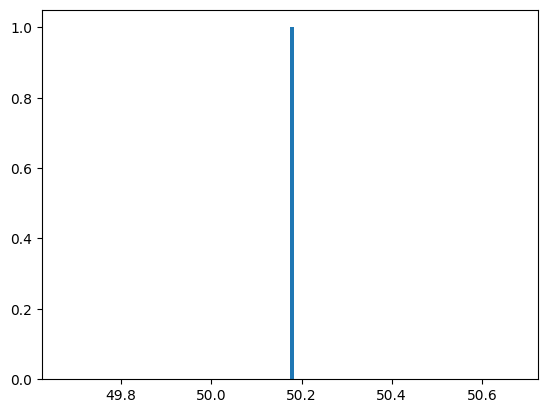

In [16]:
x = np.random.uniform(1, 60, 1)

plt.hist(x, bins=100)
plt.show()

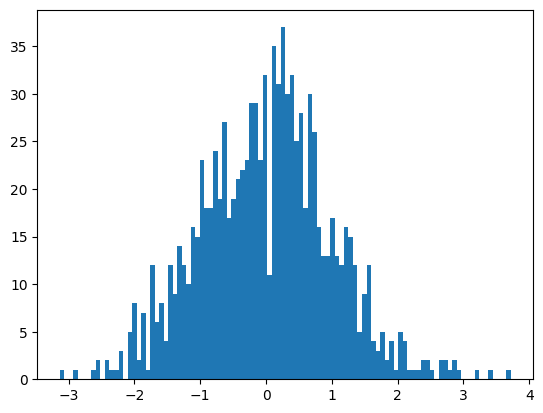

In [17]:
x = np.random.normal(0,1,1000)

plt.hist(x, bins=100)
plt.show()

In [18]:
In_time_hr_delta = 8 + int(np.clip(np.random.normal(0,1,1),-1,1))
In_time_min_delta = int(np.floor(20 + np.random.normal(0,5,1))[0])
In_time_sec_delta = int(np.random.uniform(1, 60, 1))

Out_time_hr_delta = 16 + int(np.clip(np.random.normal(0,0.7,1), -4 , 2))
Out_time_min_delta = int(np.floor(30 + np.random.normal(0,5,1))[0])
Out_time_sec_delta = int(np.random.uniform(1, 60, 1))




in_time_d = f"01-11-2023 {In_time_hr_delta}:{In_time_min_delta}:{In_time_sec_delta}"
out_time_d = f"01-11-2023 {Out_time_hr_delta}:{Out_time_min_delta}:{Out_time_sec_delta}"
# str(datetime.strptime(time_data, "%d-%m-%Y %H:%M:%S"))

print(in_time_d, out_time_d)

01-11-2023 8:30:53 01-11-2023 16:29:15


C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\4279093290.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  In_time_hr_delta = 8 + int(np.clip(np.random.normal(0,1,1),-1,1))
C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\4279093290.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  In_time_sec_delta = int(np.random.uniform(1, 60, 1))
C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\4279093290.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ou

In [19]:
name_roles = list(map(lambda x: "@".join(x), redis_face_db[['Name','Role']].values.tolist()))

In [20]:
name_roles

['Sudheer@Student',
 'Angelina Jolie@Student',
 'Chris Evans@Student',
 'Scarlett Johansson@Student',
 'Barack Obama@Teacher',
 'Morgan Freeman@Teacher']

In [21]:
date_range = pd.date_range('2023-11-01', '2024-01-15').astype('str').values.tolist()

In [22]:
def generate_dt():
    In_time_hr_delta = 8 + int(np.clip(np.random.normal(0,1,1),-1,1))
    In_time_min_delta = int(np.floor(20 + np.random.normal(0,5,1))[0])
    In_time_sec_delta = int(np.random.uniform(1, 60, 1))

    Out_time_hr_delta = 16 + int(np.clip(np.random.normal(0,0.7,1), -4 , 2))
    Out_time_min_delta = int(np.floor(30 + np.random.normal(0,5,1))[0])
    Out_time_sec_delta = int(np.random.uniform(1, 60, 1))

    in_time_d = f"{In_time_hr_delta}:{In_time_min_delta}:{In_time_sec_delta}"
    out_time_d = f"{Out_time_hr_delta}:{Out_time_min_delta}:{Out_time_sec_delta}"

    return in_time_d, out_time_d


In [23]:
dt

NameError: name 'dt' is not defined

In [24]:
logs_list = []
for dt in date_range:
    for name in name_roles:

        for i in range(np.random.randint(1, 12)):
            in_t, out_t = generate_dt()

            time_data_in = f"{dt} {in_t}"
            time_data_out = f"{dt} {out_t}"

            in_str = str(datetime.strptime(time_data_in, "%Y-%m-%d %H:%M:%S"))
            out_str = str(datetime.strptime(time_data_out, "%Y-%m-%d %H:%M:%S"))

            logs_list.append(["@".join([name, in_str]), in_str])
            logs_list.append(["@".join([name, out_str]), out_str])



C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\2783482415.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  In_time_hr_delta = 8 + int(np.clip(np.random.normal(0,1,1),-1,1))
C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\2783482415.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  In_time_sec_delta = int(np.random.uniform(1, 60, 1))
C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\2783482415.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ou

In [26]:
logs_list

[['Sudheer@Student@2023-11-01 08:16:19', '2023-11-01 08:16:19'],
 ['Sudheer@Student@2023-11-01 16:35:24', '2023-11-01 16:35:24'],
 ['Sudheer@Student@2023-11-01 08:19:41', '2023-11-01 08:19:41'],
 ['Sudheer@Student@2023-11-01 16:31:26', '2023-11-01 16:31:26'],
 ['Sudheer@Student@2023-11-01 08:24:57', '2023-11-01 08:24:57'],
 ['Sudheer@Student@2023-11-01 17:28:13', '2023-11-01 17:28:13'],
 ['Sudheer@Student@2023-11-01 08:19:29', '2023-11-01 08:19:29'],
 ['Sudheer@Student@2023-11-01 17:32:21', '2023-11-01 17:32:21'],
 ['Angelina Jolie@Student@2023-11-01 08:19:58', '2023-11-01 08:19:58'],
 ['Angelina Jolie@Student@2023-11-01 15:31:58', '2023-11-01 15:31:58'],
 ['Angelina Jolie@Student@2023-11-01 08:15:44', '2023-11-01 08:15:44'],
 ['Angelina Jolie@Student@2023-11-01 16:26:40', '2023-11-01 16:26:40'],
 ['Chris Evans@Student@2023-11-01 08:21:39', '2023-11-01 08:21:39'],
 ['Chris Evans@Student@2023-11-01 16:34:52', '2023-11-01 16:34:52'],
 ['Scarlett Johansson@Student@2023-11-01 08:23:33', '2

In [27]:
logs_df = pd.DataFrame(logs_list,columns=['logs','dt'])

In [28]:
logs_df['dt'] = pd.to_datetime((logs_df['dt']))

In [29]:
logs_df['day_name'] = logs_df['dt'].dt.day_name()

In [30]:
logs_df_1 = logs_df.query('day_name  not in ("Sunday", "Saturday")')

In [31]:
logs_df['day_name'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [32]:
logs_df_1['date'] = logs_df_1['dt'].dt.date

C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\2539149735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs_df_1['date'] = logs_df_1['dt'].dt.date


In [33]:
logs_df_1['name'] = logs_df_1['logs'].apply(lambda x: x.split('@')[0])

C:\Users\vividpath\AppData\Local\Temp\ipykernel_3536\3306348753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs_df_1['name'] = logs_df_1['logs'].apply(lambda x: x.split('@')[0])


In [34]:
logs_name_date = logs_df_1[['name','date']].drop_duplicates()

In [35]:
logs_name_date['rand1'] = np.random.randint(0,10,len(logs_name_date))

In [36]:
logs_name_date1 = logs_name_date.query('rand1 not in (0,1,2)')

In [37]:
logs_df_sim = pd.merge(logs_df_1, logs_name_date1, on = ['name','date'])

In [38]:
encoded_logs = logs_df_sim['logs'].values.tolist()

In [41]:
text = "\n".join(encoded_logs)

In [42]:
with open('simulated_logs.txt',mode='w') as f:
    f.write(text)

In [228]:
# Connect to Redis Client
hostname = 'provide host name'
portnumber = 'provide port number'
password = 'enter the password'

r = redis.StrictRedis(host=hostname,
                      port=portnumber,
                      password=password)

# Simulated Logs
with open('simulated_logs.txt','r') as f:
    logs_text = f.read()

encoded_logs = logs_text.split('\n')

# Push into Redis database
r.lpush('attendance:logs',*encoded_logs)

1

2946